In [96]:
import numpy as np
from sklearn.model_selection import train_test_split

state_seed = 85 # Seed, chcemy mieć powtarzale wyniki

# Wczytanie danych
data = np.genfromtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data", delimiter=",", dtype=str)
X = data[:, :-1].astype(np.float32)
y = np.where(data[:,-1]=='g', 1, 0) # g - 1, b - 0

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=state_seed)

# Liczność klas w zbiorze treningowym i testowym
b_count_train = np.sum(y_train==0)
g_count_train = np.sum(y_train==1)
b_count_test = np.sum(y_test==0)
g_count_test = np.sum(y_test==1)
print(f"Liczność klas w zbiorze treningowym: 'b' - {b_count_train}, 'g' - {g_count_train}")
print(f"Liczność klas w zbiorze testowym: 'b' - {b_count_test}, 'g' - {g_count_test}")


Liczność klas w zbiorze treningowym: 'b' - 101, 'g' - 179
Liczność klas w zbiorze testowym: 'b' - 25, 'g' - 46


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Konstrukcja klasyfikatora opartego na regresji logistycznej i trening
clf = LogisticRegression(random_state=state_seed, solver='lbfgs')
clf.fit(X_train, y_train)

# Ocena możliwości predykcyjnych klasyfikatora
accuracy = clf.score(X_test, y_test)
print(f"Dokładność klasyfikatora: {accuracy:.4f}") # Wynik do 4 miejsc po przecinku (w celu czytelnosci)

# Predykcja na zbiorze testowym
y_pred = clf.predict(X_test)

# Obliczenie miar jakości klasyfikacji
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print('Confusion matrix:')
print(cm)
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {roc_auc:.4f}")


Dokładność klasyfikatora: 0.9155
Confusion matrix:
[[20  5]
 [ 1 45]]
Accuracy: 0.9155
AUC: 0.9487


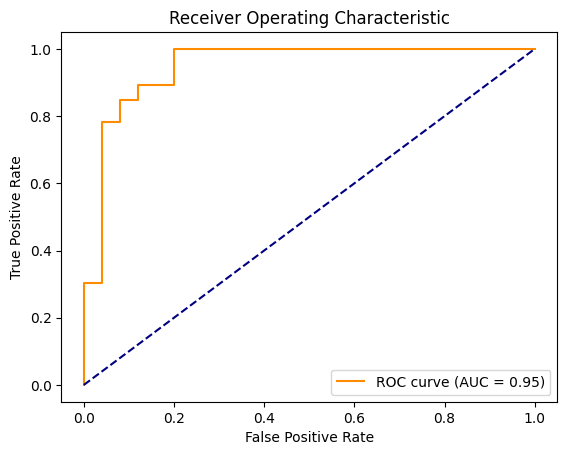

In [98]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
